# Projet 2 : Analysez des données de systèmes éducatifs

* Valider la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées ?)
* Décrire les informations contenues dans le jeu de données (nombre de colonnes ? nombre de lignes ?)
* Sélectionner les informations qui semblent pertinentes pour répondre à la problématique (quelles sont les colonnes contenant des informations qui peuvent être utiles pour répondre à la problématique de l’entreprise ?)
* Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde (moyenne/médiane/écart-type par pays et par continent ou bloc géographique)

## Importation des données

In [1]:
import pandas as pd

In [2]:
data_raw = pd.read_csv("EdStatsData.csv")
print("Le jeu de données contient {} lignes et {} colonnes.".format(data_raw.shape[0],data_raw.shape[1]))

Le jeu de données contient 886930 lignes et 70 colonnes.


## Description des données

In [3]:
data_raw.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data_raw.tail()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886929,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, m...",SE.ADT.1524.LT.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Nous observons, à partir des premières et dernières lignes :
* Le nom du pays (ou de la région) est indiqué dans la première colonne (index 0)
* le code du pays dans la deuxième colonne (index 1)
* le nom de l'indicateur est indiqué dans la troisième colonne (index 2)
* le code de l'indicateur est indiqué dans la quatrième colonne (index 3)
* les colonnes suivantes donnent les valeurs de l'indicateur depuis 1970 (index 4) à 2090.
    * valeurs passées : 1970 à 2017
    * projections futures : 2020 à 2100

Les données sont donc multi-indexé sur le pays ("Country code") et l'indicateur ("Indicator code").

De nombreuses valeurs ne sont pas renseignées (NaN). 

## Pays et régions (ou zones) et Indicateurs

In [5]:
liste_pays = list(data_raw["Country Name"].unique())
print("Nombre de pays et de régions dans le jeu de données :", len(liste_pays))
liste_pays

Nombre de pays et de régions dans le jeu de données : 242


['Arab World',
 'East Asia & Pacific',
 'East Asia & Pacific (excluding high income)',
 'Euro area',
 'Europe & Central Asia',
 'Europe & Central Asia (excluding high income)',
 'European Union',
 'Heavily indebted poor countries (HIPC)',
 'High income',
 'Latin America & Caribbean',
 'Latin America & Caribbean (excluding high income)',
 'Least developed countries: UN classification',
 'Low & middle income',
 'Low income',
 'Lower middle income',
 'Middle East & North Africa',
 'Middle East & North Africa (excluding high income)',
 'Middle income',
 'North America',
 'OECD members',
 'South Asia',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa (excluding high income)',
 'Upper middle income',
 'World',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Berm

Nous constatons qu'il y a un total de 242 pays et régions.

Les régions sont situées au début de la base de données (par ordre alphabétique, de 'Arab World' à 'World').

Ensuite viennent les pays, également classés par ordre alphabétique (de 'Afghanistan' à 'Zimbabwe').

Nous séparons la liste des pays et celle des régions.

In [6]:
liste_regions = []
while 'World' in liste_pays:
    liste_regions.append(liste_pays.pop(0))
print("Liste des {} régions : de {} à {}".format(len(liste_regions), liste_regions[0], liste_regions[-1]))
print("Liste des {} pays : de {} à {}".format(len(liste_pays), liste_pays[0], liste_pays[-1]))

Liste des 25 régions : de Arab World à World
Liste des 217 pays : de Afghanistan à Zimbabwe


In [7]:
liste_indicateurs = data_raw["Indicator Name"].unique()
print("Nombre d'indicateurs dans le jeu de données :", len(liste_indicateurs))

Nombre d'indicateurs dans le jeu de données : 3665


Il y a un très grand nombre d'indicateurs. Il ne sera bien évidemment pas possible de tous les exploiter, et nous devrons sélectionner les plus pertinents pour notre analyse.

In [8]:
pd.set_option("display.max_colwidth",1000)
data_raw[["Indicator Name", "Indicator Code"]].head(10)

,Indicator Name,Indicator Code
0,"Adjusted net enrolment rate, lower secondary, both sexes (%)",UIS.NERA.2
1,"Adjusted net enrolment rate, lower secondary, female (%)",UIS.NERA.2.F
2,"Adjusted net enrolment rate, lower secondary, gender parity index (GPI)",UIS.NERA.2.GPI
3,"Adjusted net enrolment rate, lower secondary, male (%)",UIS.NERA.2.M
4,"Adjusted net enrolment rate, primary, both sexes (%)",SE.PRM.TENR
5,"Adjusted net enrolment rate, primary, female (%)",SE.PRM.TENR.FE
6,"Adjusted net enrolment rate, primary, gender parity index (GPI)",UIS.NERA.1.GPI
7,"Adjusted net enrolment rate, primary, male (%)",SE.PRM.TENR.MA
8,"Adjusted net enrolment rate, upper secondary, both sexes (%)",UIS.NERA.3
9,"Adjusted net enrolment rate, upper secondary, female (%)",UIS.NERA.3.F


Il semble que certains indicateurs soient décliné en plusieurs "versions", par exemple :
* pour chaque sexe, 
* pour les femmes, 
* pour les hommes,
* avec un index de "gender parity" (parité de genre)
* etc.

Ces différents indicateurs ont généralement (mais pas toujours) un "Indicator Code" commençant par les 3 mêmes valeurs. Nous allons afficher la liste, classée par ordre alphabétique, du nom des indicateurs.

In [9]:
liste_indicateurs = sorted(list(data_raw["Indicator Name"].unique()))
liste_indicateurs

['Adjusted net enrolment rate, lower secondary, both sexes (%)',
 'Adjusted net enrolment rate, lower secondary, female (%)',
 'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)',
 'Adjusted net enrolment rate, lower secondary, male (%)',
 'Adjusted net enrolment rate, primary, both sexes (%)',
 'Adjusted net enrolment rate, primary, female (%)',
 'Adjusted net enrolment rate, primary, gender parity index (GPI)',
 'Adjusted net enrolment rate, primary, male (%)',
 'Adjusted net enrolment rate, upper secondary, both sexes (%)',
 'Adjusted net enrolment rate, upper secondary, female (%)',
 'Adjusted net enrolment rate, upper secondary, gender parity index (GPI)',
 'Adjusted net enrolment rate, upper secondary, male (%)',
 'Adjusted net intake rate to Grade 1 of primary education, both sexes (%)',
 'Adjusted net intake rate to Grade 1 of primary education, female (%)',
 'Adjusted net intake rate to Grade 1 of primary education, gender parity index (GPI)',
 'Adjusted 

Nous constatons aussi que certains indicateurs sont spécifiques à certaines régions/zones géographiques particulières. Ainsi, certains indicateurs sont intitulés "Africa Dataset".

## Doublons et Données manquantes

In [176]:
# Les valeurs dupliquées correspondent aux lignes qui ont le même pays et le même indicateur.
duplicates = data_raw.duplicated(subset=["Country Code","Indicator Code"], keep='first')
duplicates.unique()

array([False])

Nous constatons qu'il n'y a pas de données dupliquées (même code pays et même code indicateur).

De plus, nous faisons le calcul : (nombre de pays/régions) * (nombre d'indicateurs) = 242 * 3665 = 886'930. Cela correspond bien au nombre de lignes dans la base de données. Il n'y a donc pas de ligne manquante : il existe une ligne pour chaque couple (pays/région , indicateur).

## Sélection des colonnes pertinentes
Nous décidons de ne garder les données que jusqu'en 2030. Cela nous informera suffisamment sur l'état actuel et les perspectives à moyen terme. Nous gardons aussi les "anciennes données", car cela peut nous permettre de faire des projections pour le futur.

In [272]:
data = data_raw.loc[:,:"2030"]
# Nous affichons les premières lignes pour vérifier la structure des données
data.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, both sexes (%)",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, female (%)",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Étude du remplissage par indicateur

In [12]:
# Résumé statistique
data.describe()

,2012,2013,2014,2015,2016,2017,2020,2025,2030
count,1.472640e+05,1.375090e+05,1.137890e+05,1.310580e+05,1.646000e+04,143.000000,5.143600e+04,5.143600e+04,5.143600e+04
mean,2.176323e+10,2.425332e+10,2.678449e+10,2.353720e+10,1.934411e+11,2.160839,5.780697e+02,6.054774e+02,6.315916e+02
std,8.833955e+11,9.513016e+11,1.023180e+12,9.732465e+11,2.839188e+12,0.810584,1.475072e+04,1.577305e+04,1.678556e+04
min,-6.049930e+05,-6.157480e+05,-8.900000e+01,-2.467847e+00,-1.797539e+00,1.000000,-1.870000e+00,-2.000000e+00,-2.110000e+00
25%,1.100000e+01,1.306113e+01,1.614639e+01,4.100000e-01,1.826761e+01,2.000000,6.000000e-02,6.000000e-02,6.000000e-02
50%,9.759012e+01,1.000000e+02,1.000000e+02,5.235000e+01,6.264000e+03,2.000000,2.300000e-01,2.300000e-01,2.300000e-01
75%,1.038168e+05,1.426480e+05,1.636440e+05,6.153575e+04,5.939590e+05,3.000000,6.660000e+00,6.900000e+00,7.062500e+00
max,9.999473e+13,1.054580e+14,1.108060e+14,1.156198e+14,1.206030e+14,4.000000,1.599479e+06,1.781898e+06,1.967258e+06


Nous voyons que de très nombreuses valeurs sont manquantes pour chaque année. En effet, il y a un total de 886930 (8,86e+5) lignes.

En particulier, nous constatons que seulement 143 valeurs sont renseignées pour l'année 2017.

In [240]:
# Nous allons séléctionner les indicateurs qui ont les meilleurs taux de remplissage.
# Pour cela, nous allons agréger les données par indicateur et calculer pour chaque indicateur le taux de remplissage.

gb_indicateurs = data.groupby('Indicator Code')

In [277]:
# Pour chaque indicateur, nous allons faire le décompte des valeurs non-nulles

col_list = list(gb_indicateurs.count())
col_list.remove('Country Name')
col_list.remove('Country Code')
col_list.remove('Indicator Name')
col_list

gb_indicateurs_count = gb_indicateurs.count()

# compte des donées complétées pas indicateur
gb_indicateurs_count['Count data (past)'] = gb_indicateurs_count.loc[:,"1970":"2017"].sum(axis=1)
gb_indicateurs_count['Count data (futur)'] = gb_indicateurs_count.loc[:,"2020":"2030"].sum(axis=1)
gb_indicateurs_count['Count data (total)'] = gb_indicateurs_count['Count data (past)'] + gb_indicateurs_count['Count data (futur)']

# compte des années complétées par indicateur
gb_indicateurs_count['Count years'] = gb_indicateurs_count.loc[:,"1970":"2030"].astype(bool).sum(axis=1)

gb_indicateurs_count[::200] # affiche une valeur sur 200

,Country Name,Country Code,Indicator Name,1970,1971,1972,1973,1974,1975,1976,...,2015,2016,2017,2020,2025,2030,Count data (past),Count data (futur),Count data (total),Count years
Indicator Code,,,,,,,,,,,,,,,,,,,,,
BAR.NOED.1519.FE.ZS,242,242,242,144,0,0,0,0,144,0,...,0,0,0,0,0,0,1296,0,1296,9
BAR.SEC.CMPT.5559.FE.ZS,242,242,242,144,0,0,0,0,144,0,...,0,0,0,0,0,0,1296,0,1296,9
HH.DHS.OOS.1,242,242,242,0,0,0,0,0,0,0,...,6,0,0,0,0,0,214,0,214,26
HH.MICS.YRS.15UP.GIN,242,242,242,0,0,0,0,0,0,0,...,0,0,0,0,0,0,52,0,52,7
LO.EGRA.LSTN.0.SID.2GRD,242,242,242,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
LO.EGRA.READ.KNY.ADV.6GRD,242,242,242,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
LO.PASEC.MAT.6.P10,242,242,242,0,0,0,0,0,0,0,...,0,0,0,0,0,0,10,0,10,1
LO.PIRLS.REA.P25,242,242,242,0,0,0,0,0,0,0,...,0,45,0,0,0,0,154,0,154,4
LO.TIMSS.MAT8.MA,242,242,242,0,0,0,0,0,0,0,...,35,0,0,0,0,0,235,0,235,6


Nous constatons que certains indicateurs ne sont pas remplis du tout, par aucun pays et aucune année. Comme il y a un total de 48 colonnes pour les années passées (1970 à 2017), et 242 pays ou régions, un indicateur totalement rempli pour le passé devrait comporter 11'616 valeurs.

In [278]:
# Tri des indicateurs par nombre décroissant de réponses
data_gb_indicators = gb_indicateurs_count.sort_values("Count data (past)",ascending=False)
data_gb_indicators[::200] # affiche une valeur sur 200

,Country Name,Country Code,Indicator Name,1970,1971,1972,1973,1974,1975,1976,...,2015,2016,2017,2020,2025,2030,Count data (past),Count data (futur),Count data (total),Count years
Indicator Code,,,,,,,,,,,,,,,,,,,,,
SP.POP.TOTL,242,242,242,236,236,236,236,236,236,236,...,232,232,0,0,0,0,11155,0,11155,47
SP.POP.1317.FE.UN,242,242,242,0,0,0,0,0,0,0,...,181,0,0,0,0,0,4788,0,4788,26
UIS.R.1.G2,242,242,242,17,62,65,61,65,69,79,...,8,0,0,0,0,0,3889,0,3889,46
UIS.GTVP.3.V.F,242,242,242,0,0,0,0,0,0,0,...,5,0,0,0,0,0,2352,0,2352,19
BAR.PRM.SCHL.5559.FE,242,242,242,144,0,0,0,0,144,0,...,0,0,0,0,0,0,1296,0,1296,9
BAR.TER.SCHL.2024,242,242,242,144,0,0,0,0,144,0,...,0,0,0,0,0,0,1296,0,1296,9
UIS.OFSPPT.1,242,242,242,0,0,0,0,0,0,0,...,5,0,0,0,0,0,1056,0,1056,18
UIS.GGR.2.M,242,242,242,0,0,0,0,0,0,0,...,8,0,0,0,0,0,614,0,614,18
PRJ.ATT.2064.1.MF,242,242,242,0,0,0,0,0,0,0,...,167,0,0,167,167,167,334,501,835,5


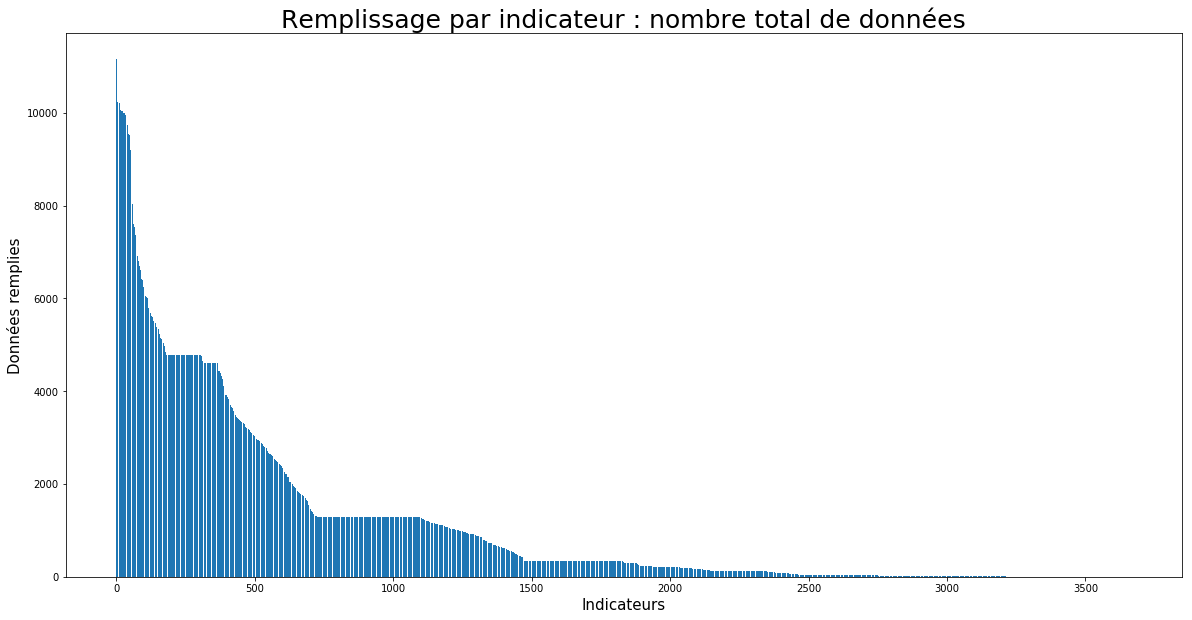

In [288]:
# Nous allons construire un diagramme en bâtons présentant le nombre de valeurs par indicateur
import matplotlib.pyplot as plt

indicateurs = range(len(data_gb_indicators))
completed_rate = data_gb_indicators.sort_values("Count data (past)",ascending=False)["Count data (past)"]

fig, ax = plt.subplots(figsize=(20, 10))
plt.title("Nombre total de données par indicateur", fontsize=25)
plt.xlabel("Indicateurs", fontsize=15)
plt.ylabel("Données remplies", fontsize=15)
plot = ax.bar(indicateurs, completed_rate)

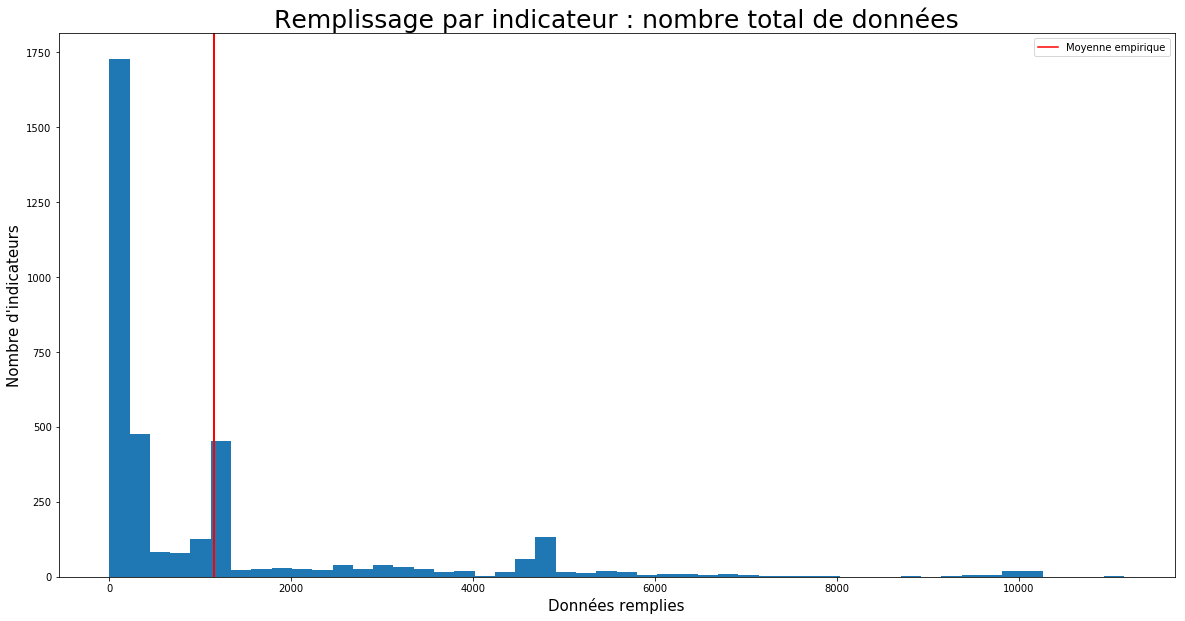

In [293]:
# La même information présentée sous forme d'histogramme
completed_rate = data_gb_indicators.sort_values("Count data (past)",ascending=False)["Count data (past)"]

fig, ax = plt.subplots(figsize=(20, 10))
plot = plt.hist(completed_rate, bins=50) #  Default : bins = 10
plt.title("Nombre total de données par indicateur", fontsize=25)
plt.xlabel("Données remplies", fontsize=15)
plt.ylabel("Nombre d'indicateurs", fontsize=15)
xbar = completed_rate.mean()# moyenne empirique
plt.axvline(xbar, color='r', linewidth=2)
import matplotlib.lines as mlines
plt.legend(handles=[mlines.Line2D([], [], color='red',markersize=15, label="Moyenne empirique")])


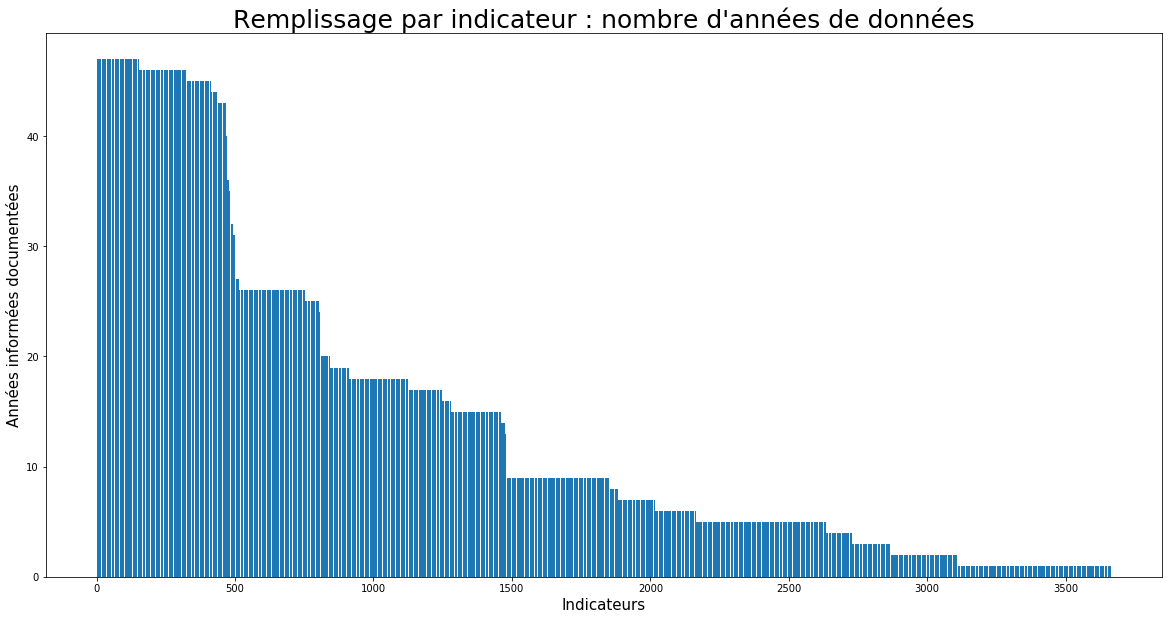

In [289]:
# Nous allons construire un diagramme en bâtons présentant le nombre d'années remplies par indicateur
import matplotlib.pyplot as plt

indicateurs = range(len(data_gb_indicators))
completed_rate = data_gb_indicators.sort_values("Count years",ascending=False)["Count years"]

fig, ax = plt.subplots(figsize=(20, 10))
plt.title("Remplissage par indicateur : nombre d'années de données", fontsize=25)
plt.xlabel("Indicateurs", fontsize=15)
plt.ylabel("Années informées documentées", fontsize=15)
plot = ax.bar(indicateurs, completed_rate)

On va maintenant chercher à connaître le remplissage de chaque indicateur par pays.

In [336]:
# On compte, pour chaque ligne pays/indicateur si il y a des données complétées
def non_nul(value):
    if value==0:
        return 0
    else:
        return 1
    
data['Indicator_filled_by_country'] = data.loc[:,"1970":"2030"].count(axis=1).apply(non_nul)

In [337]:
# On fait un tableau croisé des indicateurs et des pays par rapport au décompte
data_pt = data.pivot_table('Indicator_filled_by_country', index=['Indicator Code'], columns=[
                           'Country Name'], aggfunc="sum")
data_pt.head()

Country Name,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Arab World,Argentina,Armenia,...,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,World,"Yemen, Rep.",Zambia,Zimbabwe
Indicator Code,,,,,,,,,,,,,,,,,,,,,
BAR.NOED.1519.FE.ZS,1,1,1,0,0,0,0,0,1,1,...,0,0,1,1,0,0,0,1,1,1
BAR.NOED.1519.ZS,1,1,1,0,0,0,0,0,1,1,...,0,0,1,1,0,0,0,1,1,1
BAR.NOED.15UP.FE.ZS,1,1,1,0,0,0,0,0,1,1,...,0,0,1,1,0,0,0,1,1,1
BAR.NOED.15UP.ZS,1,1,1,0,0,0,0,0,1,1,...,0,0,1,1,0,0,0,1,1,1
BAR.NOED.2024.FE.ZS,1,1,1,0,0,0,0,0,1,1,...,0,0,1,1,0,0,0,1,1,1


In [346]:
# Nous sommons sur la ligne pour avoir le nombre de pays qui ont renseignés l'indicateur
data_pt['Count countries'] = data_pt.loc[:,"Afghanistan":"Zimbabwe"].sum(axis=1)
data_pt[::200]

Country Name,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Arab World,Argentina,Armenia,...,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,World,"Yemen, Rep.",Zambia,Zimbabwe,Count countries
Indicator Code,,,,,,,,,,,,,,,,,,,,,
BAR.NOED.1519.FE.ZS,1,1,1,0,0,0,0,0,1,1,...,0,1,1,0,0,0,1,1,1,144
BAR.SEC.CMPT.5559.FE.ZS,1,1,1,0,0,0,0,0,1,1,...,0,1,1,0,0,0,1,1,1,144
HH.DHS.OOS.1,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,69
HH.MICS.YRS.15UP.GIN,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,40
LO.EGRA.LSTN.0.SID.2GRD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
LO.EGRA.READ.KNY.ADV.6GRD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
LO.PASEC.MAT.6.P10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
LO.PIRLS.REA.P25,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,58
LO.TIMSS.MAT8.MA,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,71


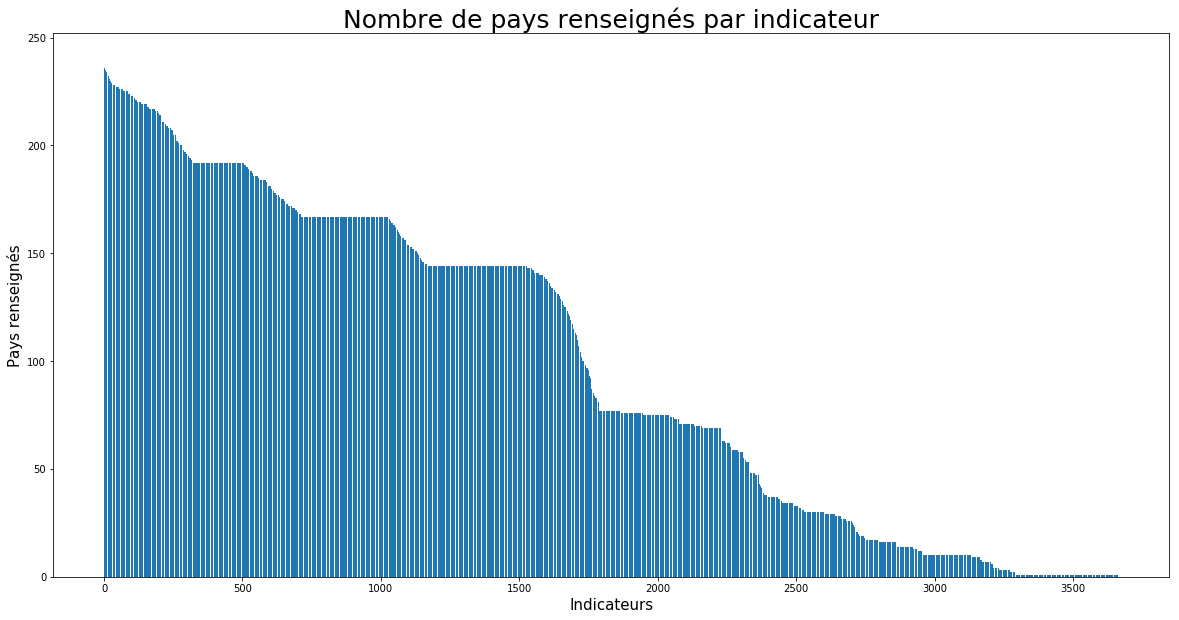

In [349]:
# # Nous allons construire un diagramme en bâtons présentant le nombre de valeurs par indicateur
import matplotlib.pyplot as plt

indicateurs = range(len(data_pt))
completed_countries = data_pt.sort_values('Count countries',ascending=False)['Count countries']

fig, ax = plt.subplots(figsize=(20, 10))
plt.title("Nombre de pays renseignés par indicateur", fontsize=25)
plt.xlabel("Indicateurs", fontsize=15)
plt.ylabel("Pays renseignés", fontsize=15)
plot = ax.bar(indicateurs, completed_countries)

## Étude du remplissage par région, en termes de données

In [236]:
masque_regions = (data["Country Name"].isin(liste_regions))
data_regions = data[masque_regions]
gb_regions = data_regions.groupby('Country Name')

In [237]:
# Pour chaque indicateur, nous allons faire le décompte des valeurs non-nulles
col_list = list(gb_regions.count())
col_list.remove('Country Code')
col_list.remove('Indicator Name')
col_list.remove('Indicator Code')
col_list

# Séparer en valeurs "passées" et valeurs "futur"

# On fait le compte des données complétées par pays, et on classe par ordre décroissant
gb_regions_count = gb_regions.count()
gb_regions_count['Total'] = gb_regions_count.loc[:,"1970":"2030"].sum(axis=1)
gb_regions_count = gb_regions_count.sort_values("Total",ascending=False)
gb_regions_count[::]

,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,...,2012,2013,2014,2015,2016,2017,2020,2025,2030,Total
Country Name,,,,,,,,,,,,,,,,,,,,,
World,3665,3665,3665,175,175,178,180,184,184,184,...,350,353,340,457,34,0,308,308,308,13254
Latin America & Caribbean (excluding high income),3665,3665,3665,192,198,198,198,201,201,198,...,370,364,331,34,34,0,0,0,0,12061
Latin America & Caribbean,3665,3665,3665,192,198,198,199,201,201,198,...,360,360,327,34,34,0,0,0,0,11890
Middle East & North Africa,3665,3665,3665,183,184,189,188,195,195,196,...,360,368,344,34,34,0,0,0,0,11828
Middle East & North Africa (excluding high income),3665,3665,3665,183,183,186,182,190,189,194,...,366,366,343,34,34,0,0,0,0,11801
Least developed countries: UN classification,3665,3665,3665,139,147,169,178,178,181,184,...,362,364,339,34,34,0,0,0,0,11801
Heavily indebted poor countries (HIPC),3665,3665,3665,143,150,187,189,190,190,190,...,370,370,348,34,34,0,0,0,0,11794
Arab World,3665,3665,3665,175,182,189,185,192,195,195,...,362,366,310,1,0,0,0,0,0,11778
Lower middle income,3665,3665,3665,182,185,185,185,182,182,184,...,351,356,344,149,34,0,0,0,0,11748


Il y a un total de 51 colonnes pour les années passées (1970 à 2030), et 3665 indicateurs. Une région dont tous les indicateurs sont remplis devrait donc compter 186'915 valeurs.

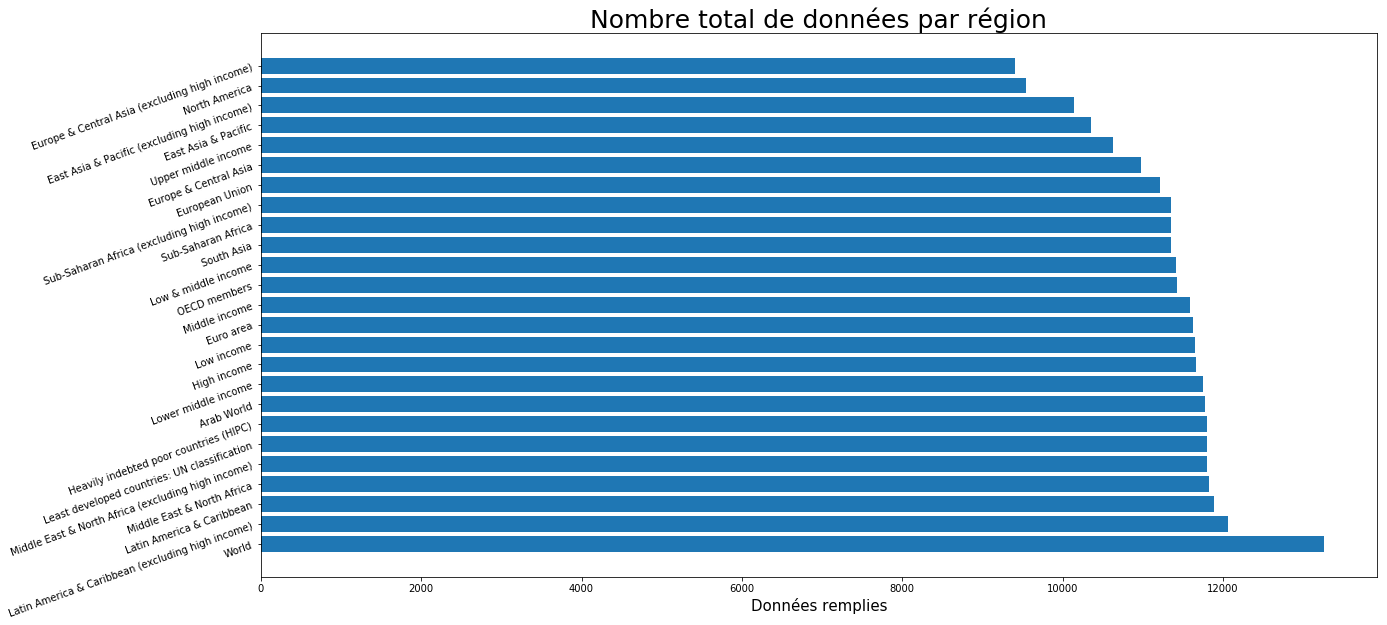

In [351]:
# Nous allons construire un diagramme en bâtons présentant le nombre de valeurs par région
import matplotlib.pyplot as plt

regions = list(gb_regions_count.index)
completed_rate = gb_regions_count["Total"]

fig, ax = plt.subplots(figsize=(20, 10))
plt.title("Nombre total de données par région", fontsize=25)
plt.yticks(rotation=20)
plt.xlabel("Données remplies", fontsize=15)

plot = ax.barh(regions, completed_rate)

Nous constatons que les taux de remplissages sont plutôt homogènes, mais faibles (de l'ordre de 7%).

## Étude du remplissage par pays, en terme de données

In [22]:
data_countries = data[~masque_regions]
gb_country = data_countries.groupby('Country Name')

# Pour chaque indicateur, nous allons faire le décompte des valeurs non-nulles
col_list = list(gb_country.count())
col_list.remove('Country Code')
col_list.remove('Indicator Name')
col_list.remove('Indicator Code')
col_list

# Séparer en valeurs "passées" et valeurs "futur"

# On fait le compte des données complétées par pays, et on classe par ordre décroissant
gb_country_count = gb_country.count()
gb_country_count['Total'] = gb_country_count[col_list].sum(axis=1)
gb_country_count = gb_country_count.sort_values("Total",ascending=False)
gb_country_count[::10] # affiche une valeur sur 10

,Country Code,Indicator Name,Indicator Code,2012,2013,2014,2015,2016,2020,2025,2030,Total
Country Name,,,,,,,,,,,,
Ghana,3665,3665,3665,814,989,876,1176,165,308,308,308,4944
Bulgaria,3665,3665,3665,1017,932,800,823,88,308,308,308,4584
Ecuador,3665,3665,3665,936,938,705,739,212,308,308,308,4454
Peru,3665,3665,3665,967,837,692,830,105,308,308,308,4355
United States,3665,3665,3665,941,758,701,835,87,308,308,308,4246
New Zealand,3665,3665,3665,810,652,711,957,87,308,308,308,4141
Guinea,3665,3665,3665,953,784,748,556,68,308,308,308,4033
Sao Tome and Principe,3665,3665,3665,611,596,663,976,137,308,308,308,3907
Bhutan,3665,3665,3665,803,831,582,571,125,308,308,308,3836


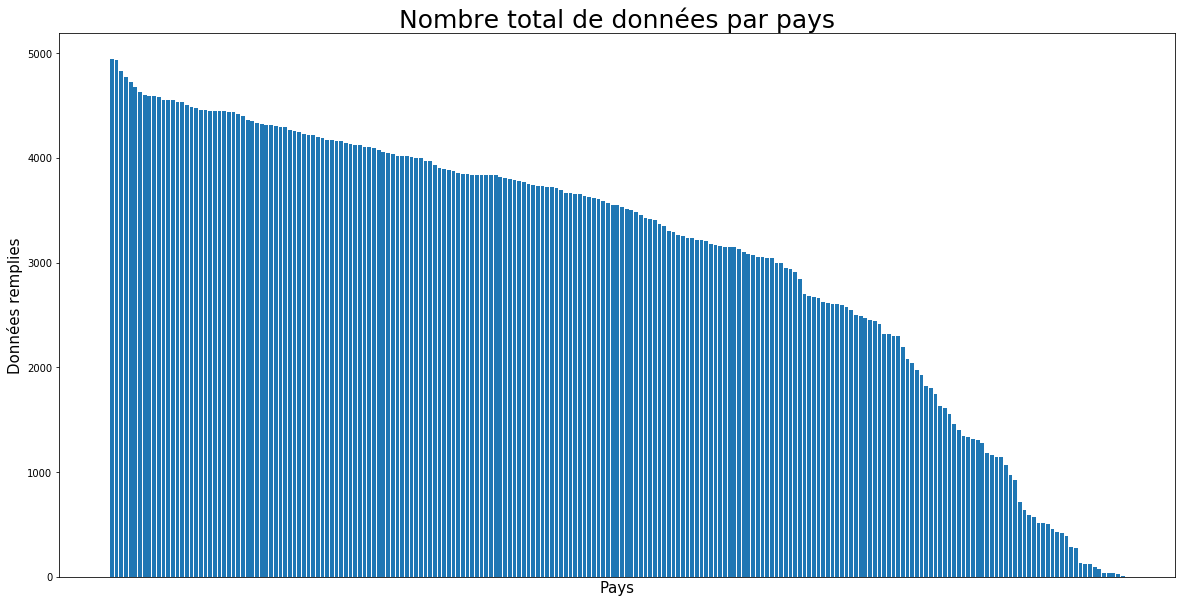

In [350]:
# Nous allons construire un diagramme en bâtons présentant le nombre de valeurs par pays
import matplotlib.pyplot as plt

countries = list(gb_country_count.index)
completed_rate = gb_country_count["Total"]

fig, ax = plt.subplots(figsize=(20, 10))
plt.title("Nombre total de données par pays", fontsize=25)
plt.xticks([])
plt.xlabel("Pays", fontsize=15)
plt.ylabel("Données remplies", fontsize=15)
plot = ax.bar(countries, completed_rate)

Cette représentation n'étant pas très pertinente en raison du très grand nombre de pays, nous allons la remplacer par un histogramme.

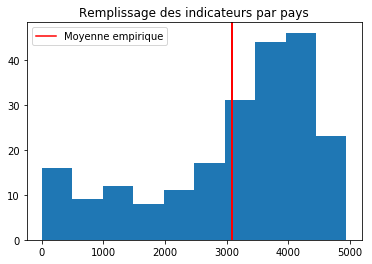

In [24]:
completed_rate = gb_country_count["Total"]

plot = plt.hist(completed_rate, bins=10) #  Default : bins = 10
plt.title("Nombre total de données par pays")
xbar = completed_rate.mean()# moyenne empirique
plt.axvline(xbar, color='r', linewidth=2)
import matplotlib.lines as mlines
plt.legend(handles=[mlines.Line2D([], [], color='red',markersize=15, label="Moyenne empirique")])


## Étude du remplissage par pays, en termes d'indicateurs

In [354]:
# On fait un tableau croisé des pays et des indicateurs par rapport au décompte
data_pt2 = data.pivot_table('Indicator_filled_by_country', index=['Country Name'], columns=['Indicator Code'
                           ], aggfunc="sum")
data_pt2.head()

Indicator Code,BAR.NOED.1519.FE.ZS,BAR.NOED.1519.ZS,BAR.NOED.15UP.FE.ZS,BAR.NOED.15UP.ZS,BAR.NOED.2024.FE.ZS,BAR.NOED.2024.ZS,BAR.NOED.2529.FE.ZS,BAR.NOED.2529.ZS,BAR.NOED.25UP.FE.ZS,BAR.NOED.25UP.ZS,...,UIS.XUNIT.US.4.FSGOV,UIS.XUNIT.US.56.FSGOV,UIS.XUNIT.USCONST.1.FSGOV,UIS.XUNIT.USCONST.2.FSGOV,UIS.XUNIT.USCONST.23.FSGOV,UIS.XUNIT.USCONST.3.FSGOV,UIS.XUNIT.USCONST.4.FSGOV,UIS.XUNIT.USCONST.56.FSGOV,XGDP.23.FSGOV.FDINSTADM.FFD,XGDP.56.FSGOV.FDINSTADM.FFD
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Albania,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,0,1,1,1
Algeria,1,1,1,1,1,1,1,1,1,1,...,0,0,1,1,1,1,0,0,1,0
American Samoa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Andorra,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [356]:
# Nous sommons sur la ligne pour avoir le nombre de pays qui ont renseignés l'indicateur
data_pt2['Count indicators'] = data_pt2.loc[:,"BAR.NOED.1519.FE.ZS":"XGDP.56.FSGOV.FDINSTADM.FFD"].sum(axis=1)
data_pt2.head()

Indicator Code,BAR.NOED.1519.FE.ZS,BAR.NOED.1519.ZS,BAR.NOED.15UP.FE.ZS,BAR.NOED.15UP.ZS,BAR.NOED.2024.FE.ZS,BAR.NOED.2024.ZS,BAR.NOED.2529.FE.ZS,BAR.NOED.2529.ZS,BAR.NOED.25UP.FE.ZS,BAR.NOED.25UP.ZS,...,UIS.XUNIT.US.56.FSGOV,UIS.XUNIT.USCONST.1.FSGOV,UIS.XUNIT.USCONST.2.FSGOV,UIS.XUNIT.USCONST.23.FSGOV,UIS.XUNIT.USCONST.3.FSGOV,UIS.XUNIT.USCONST.4.FSGOV,UIS.XUNIT.USCONST.56.FSGOV,XGDP.23.FSGOV.FDINSTADM.FFD,XGDP.56.FSGOV.FDINSTADM.FFD,Count indicators
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1475
Albania,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,2217
Algeria,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,0,0,1,0,1838
American Samoa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,96
Andorra,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,863


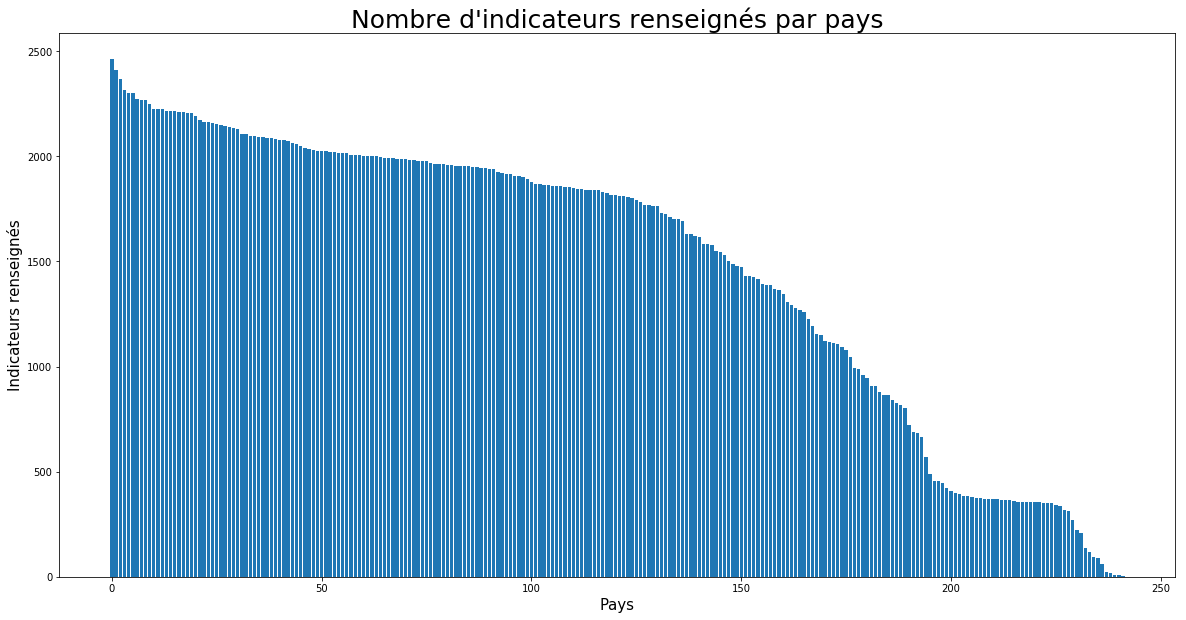

In [357]:
# # Nous allons construire un diagramme en bâtons présentant le nombre de valeurs par indicateur
import matplotlib.pyplot as plt

countries = range(len(data_pt2))
completed_indicators = data_pt2.sort_values('Count indicators',ascending=False)['Count indicators']

fig, ax = plt.subplots(figsize=(20, 10))
plt.title("Nombre d'indicateurs renseignés par pays", fontsize=25)
plt.xlabel("Pays", fontsize=15)
plt.ylabel("Indicateurs renseignés", fontsize=15)
plot = ax.bar(countries, completed_indicators)

## Séparation des "données réelles" (passées) et des projections (futures)
Les données réelles sont celles concernant les années 1970 à 2017. Les données futures sont celles concernant les années 2020 à 2100.

In [352]:
data_past = data_raw.loc[:,:"2017"]
data_futur = pd.concat([data_raw.loc[:,"Country Name":"Indicator Code"],data_raw.loc[:,"2020":"2100"]], axis=1)

## Récupération des "indicateurs généraux"
Nous avons vu plus haut que les indicateurs se décomposent le plus souvent en sous-indicateurs. Nous allons essayer de séparer les « indicateurs généraux » et les sous-indicateurs en utilisant un script.

In [27]:
# Nous récupérons la liste des codes des indicateurs, classée par ordre alphabétique
liste_codes_indicateurs = sorted(list(data_raw["Indicator Code"].unique()))
len(liste_codes_indicateurs)

3665

In [28]:
# Script pour récupérer les indicateurs principaux et les sous-indicateurs

indicateurs_principaux = {} # initialisation d'un dictionnaire contenant les indicateurs principaux
for indicateur in liste_codes_indicateurs:
    flag = False # indique si la chaîne de l'indicateur est une sous-chaîne d'un autre indicateur
    for indicateur_principal in indicateurs_principaux:
        if indicateur_principal not in indicateur:
            continue
        else:
            flag = True
    if flag == False:
        for autre_indicateur in liste_codes_indicateurs:

            if (autre_indicateur != indicateur)&(indicateur in autre_indicateur): 
                # on vérifie si le code du autre_indicateur est une sous-chaîne du code de l'indicateur
                # indicateurs_expurges.remove(autre_indicateur)
                try:
                    indicateurs_principaux[indicateur].append(autre_indicateur) # ajouter le sous-indicateur à la liste
                except KeyError: # si la clef n'existe pas encore dans le dictionnaire, lève une erreur
                    indicateurs_principaux[indicateur] = [autre_indicateur] # crée la liste des sous-indicateurs
            else:
                pass

print("Il y a {} indicateurs possèdant des sous-indicateurs.".format(len(indicateurs_principaux.keys())))

Il y a 342 indicateurs possèdant des sous-indicateurs.


In [29]:
# On ajoute également au dictionnaire les indicateurs n'ayant pas de sous-indicateurs.
indicateurs_sans_enfants={}
for indicateur in liste_codes_indicateurs:
    flag = False # indique si la chaîne de l'indicateur est une sous-chaîne d'un autre indicateur
    for indicateur_principal in indicateurs_principaux:
        if indicateur_principal not in indicateur:
            continue
        else:
            flag = True
    if flag == False:
        indicateurs_sans_enfants[indicateur]=[]
        
print("Il reste {} indicateurs orphelins et sans enfants.".format(len(indicateurs_sans_enfants.keys())))

Il reste 1610 indicateurs orphelins et sans enfants.


Nous constatons que nous avons récupérés une partie des indicateurs principaux, mais une partie nous a encore échappée :
* ceux du type : 'BAR.SEC.ICMP.1519.FE.ZS' et 'BAR.SEC.ICMP.1519.ZS'
* ceux du type : 'PRJ.POP.2529.NED.FE', 'PRJ.POP.2529.NED.MA', 'PRJ.POP.2529.NED.MF'
* ceux du type : 'PRJ.POP.ALL.1.MF', 'PRJ.POP.2024.1.MF', 'PRJ.POP.2529.1.MF'

Nous allons refaire un petit script pour gérer ces cas particuliers.

In [360]:
def is_sous_indic(indicateur1, indicateur2):
    """Fonction décomposant les codes des indicateurs en mots clefs et regardant si ils sont une
    sous-liste d'un autre indicateur"""
    if indicateur1==indicateur2:
        return False # si les deux indicateurs sont les mêmes
    ind1 = indicateur1.split(".")
    # On nettoie les mots clefs qui généralisent : ALL, ZS, MF…
    ind1 = list(set(ind1) - set(("ALL","MF","ZS","TO","T","TOT","TOTL")))
    ind2 = indicateur2.split(".")

    checklist = [ i in ind2 for i in ind1]
    for check in checklist:
        if check==False:
            return False # indicateur2 n'est pas un sous-indicateur de indicateur1
        else:
            pass
    return True

In [361]:
# Récupération du nom et des codes des indicateurs
indics = data_raw[["Indicator Name","Indicator Code"]].copy()
indics = indics.drop_duplicates() # on ne garde qu'un seul exemplaire
indics = indics.set_index("Indicator Code")
len(indics)
indics.head()

,Indicator Name
Indicator Code,
UIS.NERA.2,"Adjusted net enrolment rate, lower secondary, both sexes (%)"
UIS.NERA.2.F,"Adjusted net enrolment rate, lower secondary, female (%)"
UIS.NERA.2.GPI,"Adjusted net enrolment rate, lower secondary, gender parity index (GPI)"
UIS.NERA.2.M,"Adjusted net enrolment rate, lower secondary, male (%)"
SE.PRM.TENR,"Adjusted net enrolment rate, primary, both sexes (%)"


In [362]:
# fonction qui décompose le code de l'indicateur (en nettoyant les mots clefs généralisants)
def split_ind(indicateur):
    split = indicateur.split(".")
    generic_words = ("ALL","MF","ZS","TO","T","TOT","TOTL") # mots clefs généralisants
    result = list(set(split) - set(generic_words))
    return result

# on crée une nouvelle colonne avec les mots clefs
indics["Indicator Keywords"] = indics.index
indics["Indicator Keywords"] = indics["Indicator Keywords"].apply(split_ind)
indics.tail()

,Indicator Name,Indicator Keywords
Indicator Code,,
UIS.LP.AG15T24.M,"Youth illiterate population, 15-24 years, male (number)","[UIS, LP, AG15T24, M]"
SE.ADT.1524.LT.ZS,"Youth literacy rate, population 15-24 years, both sexes (%)","[1524, LT, SE, ADT]"
SE.ADT.1524.LT.FE.ZS,"Youth literacy rate, population 15-24 years, female (%)","[SE, LT, ADT, FE, 1524]"
SE.ADT.1524.LT.FM.ZS,"Youth literacy rate, population 15-24 years, gender parity index (GPI)","[SE, FM, LT, ADT, 1524]"
SE.ADT.1524.LT.MA.ZS,"Youth literacy rate, population 15-24 years, male (%)","[SE, LT, ADT, 1524, MA]"


In [363]:
# Script pour récupérer les indicateurs principaux et les sous-indicateurs

indics["Children Indicators"]= None
indics["Parents Indicators"]= None

for indicateur in liste_indicateurs:
    for autre_indicateur in liste_indicateurs :
        # Si les mots clefs de l'indicateur sont un sous-ensemble des mots clefs de autre_indicateur
        if is_sous_indic(indicateur, autre_indicateur) and indicateur!=autre_indicateur:
            try:
                indics.loc[indicateur]['Children Indicators'].append(autre_indicateur)
            except AttributeError:
                indics.loc[indicateur]['Children Indicators']=[autre_indicateur]
            
            try:
                indics.loc[autre_indicateur]['Parents Indicators'].append(indicateur)
            except AttributeError:
                indics.loc[autre_indicateur]['Parents Indicators']=[indicateur]

In [364]:
indics.sort_values(by="Indicator Code")

,Indicator Name,Indicator Keywords,Children Indicators,Parents Indicators
Indicator Code,,,,
BAR.NOED.1519.FE.ZS,Barro-Lee: Percentage of female population age 15-19 with no education,"[NOED, FE, BAR, 1519]",None,[BAR.NOED.1519.ZS]
BAR.NOED.1519.ZS,Barro-Lee: Percentage of population age 15-19 with no education,"[NOED, BAR, 1519]",[BAR.NOED.1519.FE.ZS],None
BAR.NOED.15UP.FE.ZS,Barro-Lee: Percentage of female population age 15+ with no education,"[NOED, FE, 15UP, BAR]",None,[BAR.NOED.15UP.ZS]
BAR.NOED.15UP.ZS,Barro-Lee: Percentage of population age 15+ with no education,"[NOED, 15UP, BAR]",[BAR.NOED.15UP.FE.ZS],None
BAR.NOED.2024.FE.ZS,Barro-Lee: Percentage of female population age 20-24 with no education,"[NOED, FE, BAR, 2024]",None,[BAR.NOED.2024.ZS]
BAR.NOED.2024.ZS,Barro-Lee: Percentage of population age 20-24 with no education,"[NOED, BAR, 2024]",[BAR.NOED.2024.FE.ZS],None
BAR.NOED.2529.FE.ZS,Barro-Lee: Percentage of female population age 25-29 with no education,"[NOED, FE, BAR, 2529]",None,[BAR.NOED.2529.ZS]
BAR.NOED.2529.ZS,Barro-Lee: Percentage of population age 25-29 with no education,"[NOED, BAR, 2529]",[BAR.NOED.2529.FE.ZS],None
BAR.NOED.25UP.FE.ZS,Barro-Lee: Percentage of female population age 25+ with no education,"[NOED, 25UP, FE, BAR]",None,[BAR.NOED.25UP.ZS]


In [365]:
# On récupère la liste des indicateurs sans parents
indics_without_parents = indics[indics["Parents Indicators"].isnull()]
print("Il y a {} indicateurs sans parents.".format(len(indics_without_parents)))

list_indics_without_parents = list(indics_without_parents.index)

Il y a 1000 indicateurs sans parents.


In [366]:
# On récupère la liste des indicateurs isolés (sans parents ni enfants)
indics_isolated = indics[indics["Parents Indicators"].isnull() & indics["Children Indicators"].isnull()]
print("Il y a {} indicateurs sans parents ni enfants.".format(len(indics_isolated)))

list_indics_isolated = list(indics_isolated.index)

Il y a 524 indicateurs sans parents ni enfants.


In [367]:
# On affiche cette liste
sorted(list_indics_isolated)

['IT.CMP.PCMP.P2',
 'IT.NET.USER.P2',
 'LO.EGRA.CLPM.AFA.2GRD',
 'LO.EGRA.CLPM.AFA.3GRD',
 'LO.EGRA.CLPM.AMH.2GRD',
 'LO.EGRA.CLPM.AMH.3GRD',
 'LO.EGRA.CLPM.BMN.2GRD',
 'LO.EGRA.CLPM.BOM.2GRD',
 'LO.EGRA.CLPM.CHC.2GRD',
 'LO.EGRA.CLPM.CHC.4GRD',
 'LO.EGRA.CLPM.ENG.2GRD',
 'LO.EGRA.CLPM.ENG.3GRD',
 'LO.EGRA.CLPM.ENG.4GRD',
 'LO.EGRA.CLPM.FLF.2GRD',
 'LO.EGRA.CLPM.FRN.3GRD',
 'LO.EGRA.CLPM.HAR.2GRD',
 'LO.EGRA.CLPM.HAR.3GRD',
 'LO.EGRA.CLPM.SID.2GRD',
 'LO.EGRA.CLPM.SID.3GRD',
 'LO.EGRA.CLPM.SNG.2GRD',
 'LO.EGRA.CLPM.SOM.2GRD',
 'LO.EGRA.CLPM.SOM.3GRD',
 'LO.EGRA.CLPM.SPN.2GRD',
 'LO.EGRA.CLPM.SPN.3GRD',
 'LO.EGRA.CLPM.SPN.4GRD',
 'LO.EGRA.CLPM.TIG.2GRD',
 'LO.EGRA.CLPM.TIG.3GRD',
 'LO.EGRA.CLSPM.AKU.2GRD',
 'LO.EGRA.CLSPM.ARB.2GRD',
 'LO.EGRA.CLSPM.ARB.3GRD',
 'LO.EGRA.CLSPM.AST.2GRD',
 'LO.EGRA.CLSPM.CHI.2GRD',
 'LO.EGRA.CLSPM.CIN.2GRD',
 'LO.EGRA.CLSPM.DAG.2GRD',
 'LO.EGRA.CLSPM.DAGB.2GRD',
 'LO.EGRA.CLSPM.DAN.2GRD',
 'LO.EGRA.CLSPM.ENG.2GRD',
 'LO.EGRA.CLSPM.ENG.3GRD',
 'LO.EGRA.CLSP

In [368]:
# On récupère la liste des indicateurs sans parents mais avec enfants
indics_masters = indics[indics["Parents Indicators"].isnull()& indics["Children Indicators"].notnull()]
print("Il y a {} indicateurs sans parents mais avec enfants.".format(len(indics_masters)))

list_indics_masters = list(indics_masters.index)

Il y a 476 indicateurs sans parents mais avec enfants.


In [369]:
# On affiche cette liste
sorted(list_indics_masters)

['BAR.NOED.1519.ZS',
 'BAR.NOED.15UP.ZS',
 'BAR.NOED.2024.ZS',
 'BAR.NOED.2529.ZS',
 'BAR.NOED.25UP.ZS',
 'BAR.NOED.3034.ZS',
 'BAR.NOED.3539.ZS',
 'BAR.NOED.4044.ZS',
 'BAR.NOED.4549.ZS',
 'BAR.NOED.5054.ZS',
 'BAR.NOED.5559.ZS',
 'BAR.NOED.6064.ZS',
 'BAR.NOED.6569.ZS',
 'BAR.NOED.7074.ZS',
 'BAR.NOED.75UP.ZS',
 'BAR.POP.1519',
 'BAR.POP.15UP',
 'BAR.POP.2024',
 'BAR.POP.2529',
 'BAR.POP.25UP',
 'BAR.POP.3034',
 'BAR.POP.3539',
 'BAR.POP.4044',
 'BAR.POP.4549',
 'BAR.POP.5054',
 'BAR.POP.5559',
 'BAR.POP.6064',
 'BAR.POP.6569',
 'BAR.POP.7074',
 'BAR.POP.75UP',
 'BAR.PRM.CMPT.1519.ZS',
 'BAR.PRM.CMPT.15UP.ZS',
 'BAR.PRM.CMPT.2024.ZS',
 'BAR.PRM.CMPT.2529.ZS',
 'BAR.PRM.CMPT.25UP.ZS',
 'BAR.PRM.CMPT.3034.ZS',
 'BAR.PRM.CMPT.3539.ZS',
 'BAR.PRM.CMPT.4044.ZS',
 'BAR.PRM.CMPT.4549.ZS',
 'BAR.PRM.CMPT.5054.ZS',
 'BAR.PRM.CMPT.5559.ZS',
 'BAR.PRM.CMPT.6064.ZS',
 'BAR.PRM.CMPT.6569.ZS',
 'BAR.PRM.CMPT.7074.ZS',
 'BAR.PRM.CMPT.75UP.ZS',
 'BAR.PRM.ICMP.1519.ZS',
 'BAR.PRM.ICMP.15UP.ZS',
 'BAR

Nous constatons qu'il reste encore dans ces différentes listes beaucoup d'indicateurs qui sont comme des déclinaisons d'un même indicateur, sans qu'il existe réellement un indicateur "parent" permettant de les généraliser.

Nous allons faire une jonction de ce Dataframe contenant les indicateurs avec celui donnant le nombre de données remplies par indicateur.

In [371]:
indics = pd.merge(indics, data_gb_indicators['Count data (total)'], on='Indicator Code')

# On affiche les 50 premiers indicateurs sans parents, triés par taux de remplissage.
indics[indics["Parents Indicators"].isnull()].sort_values(by='Count data (total)', ascending=False).head(50)

,Indicator Name,Indicator Keywords,Children Indicators,Parents Indicators,Count data (total)
Indicator Code,,,,,
SP.POP.TOTL,"Population, total","[POP, SP]","[SP.POP.GROW, SP.POP.AG00.FE.UN, SP.POP.AG00.MA.UN, SP.POP.AG00.TO.UN, SP.POP.AG01.FE.UN, SP.POP.AG01.MA.UN, SP.POP.AG01.TO.UN, SP.POP.AG10.FE.UN, SP.POP.AG10.MA.UN, SP.POP.AG10.TO.UN, SP.POP.AG11.FE.UN, SP.POP.AG11.MA.UN, SP.POP.AG11.TO.UN, SP.POP.AG12.FE.UN, SP.POP.AG12.MA.UN, SP.POP.AG12.TO.UN, SP.POP.AG13.FE.UN, SP.POP.AG13.MA.UN, SP.POP.AG13.TO.UN, SP.POP.AG14.FE.UN, SP.POP.AG14.MA.UN, SP.POP.AG14.TO.UN, SP.POP.AG15.FE.UN, SP.POP.AG15.MA.UN, SP.POP.AG15.TO.UN, SP.POP.AG16.FE.UN, SP.POP.AG16.MA.UN, SP.POP.AG16.TO.UN, SP.POP.AG17.FE.UN, SP.POP.AG17.MA.UN, SP.POP.AG17.TO.UN, SP.POP.AG18.FE.UN, SP.POP.AG18.MA.UN, SP.POP.AG18.TO.UN, SP.POP.AG19.FE.UN, SP.POP.AG19.MA.UN, SP.POP.AG19.TO.UN, SP.POP.AG02.FE.UN, SP.POP.AG02.MA.UN, SP.POP.AG02.TO.UN, SP.POP.AG20.FE.UN, SP.POP.AG20.MA.UN, SP.POP.AG20.TO.UN, SP.POP.AG21.FE.UN, SP.POP.AG21.MA.UN, SP.POP.AG21.TO.UN, SP.POP.AG22.FE.UN, SP.POP.AG22.MA.UN, SP.POP.AG22.TO.UN, SP.POP.AG23.FE.UN, SP.POP.AG23.MA.UN, SP.POP.AG23.TO.UN, SP.POP.AG24.F...",None,11155
SP.PRE.TOTL.IN,"Population of the official age for pre-primary education, both sexes (number)","[IN, SP, PRE]","[SP.PRE.TOTL.FE.IN, SP.PRE.TOTL.MA.IN]",None,10064
SP.SEC.TOTL.IN,"Population of the official age for secondary education, both sexes (number)","[IN, SEC, SP]","[SP.SEC.LTOT.IN, SP.SEC.LTOT.FE.IN, SP.SEC.LTOT.MA.IN, SP.SEC.TOTL.FE.IN, SP.SEC.TOTL.MA.IN, SP.SEC.UTOT.IN, SP.SEC.UTOT.FE.IN, SP.SEC.UTOT.MA.IN]",None,10043
UIS.SAP.1.G1,"Population of the official entrance age to primary education, both sexes (number)","[UIS, G1, SAP, 1]","[UIS.SAP.1.G1.F, UIS.SAP.1.G1.M]",None,10000
SP.PRM.TOTL.IN,"Population of the official age for primary education, both sexes (number)","[PRM, IN, SP]","[SP.PRM.TOTL.FE.IN, SP.PRM.TOTL.MA.IN]",None,9997
SP.PRM.GRAD.TO,"Population of the official age for the last grade of primary education, both sexes (number)","[PRM, GRAD, SP]","[SP.PRM.GRAD.FE, SP.PRM.GRAD.MA]",None,9955
SP.TER.TOTL.IN,"Population of the official age for tertiary education, both sexes (number)","[IN, SP, TER]","[SP.TER.TOTL.FE.IN, SP.TER.TOTL.MA.IN]",None,9753
SE.PRM.AGES,Official entrance age to primary education (years),"[AGES, PRM, SE]",None,None,9629
SE.PRM.DURS,Theoretical duration of primary education (years),"[PRM, SE, DURS]",None,None,9629


Nous faisons également une jonction de ce Dataframe avec ceux donnant 1) le nombre d'années complétées 2) le nombre de pays par indicateur.

In [372]:
indics = pd.merge(indics, data_gb_indicators["Count years"], on='Indicator Code')
indics = pd.merge(indics, data_pt['Count countries'], on='Indicator Code')

indics

,Indicator Name,Indicator Keywords,Children Indicators,Parents Indicators,Count data (total),Count years,Count countries
Indicator Code,,,,,,,
UIS.NERA.2,"Adjusted net enrolment rate, lower secondary, both sexes (%)","[2, UIS, NERA]","[UIS.NERA.2.F, UIS.NERA.2.GPI, UIS.NERA.2.M]",[UIS.T.2],2405,46,176
UIS.NERA.2.F,"Adjusted net enrolment rate, lower secondary, female (%)","[2, UIS, NERA, F]",None,"[UIS.NERA.2, UIS.T.2, UIS.T.2.F]",2260,46,173
UIS.NERA.2.GPI,"Adjusted net enrolment rate, lower secondary, gender parity index (GPI)","[2, UIS, NERA, GPI]",None,"[UIS.NERA.2, UIS.T.2]",2248,46,173
UIS.NERA.2.M,"Adjusted net enrolment rate, lower secondary, male (%)","[2, UIS, M, NERA]",None,"[UIS.NERA.2, UIS.T.2]",2248,46,173
SE.PRM.TENR,"Adjusted net enrolment rate, primary, both sexes (%)","[PRM, SE, TENR]","[SE.PRM.TENR.FE, SE.PRM.TENR.MA]",None,3216,47,208
SE.PRM.TENR.FE,"Adjusted net enrolment rate, primary, female (%)","[FE, PRM, SE, TENR]",None,[SE.PRM.TENR],2932,47,205
UIS.NERA.1.GPI,"Adjusted net enrolment rate, primary, gender parity index (GPI)","[UIS, NERA, 1, GPI]",None,None,4165,46,214
SE.PRM.TENR.MA,"Adjusted net enrolment rate, primary, male (%)","[PRM, TENR, MA, SE]",None,[SE.PRM.TENR],2932,47,205
UIS.NERA.3,"Adjusted net enrolment rate, upper secondary, both sexes (%)","[UIS, NERA, 3]","[UIS.NERA.3.F, UIS.NERA.3.GPI, UIS.NERA.3.M]",[UIS.T.3],773,18,157
